In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
df_new=pd.read_csv("transactions_with_anomalies.csv")

In [ ]:
df_new.set_index(df_new.random_datetime,inplace=True)

In [ ]:
df_new.index=pd.to_datetime(df_new.index)

In [ ]:
df_new.drop("random_datetime",axis=1,inplace=True)

In [ ]:
df_new.head()

,tx_amount
random_datetime,
2024-01-01,-1.373723
2024-01-01,-1.373633
2024-01-01,-1.373782
2024-01-01,-1.373902
2024-01-01,-1.373782


SEE COLUMNS VALUE

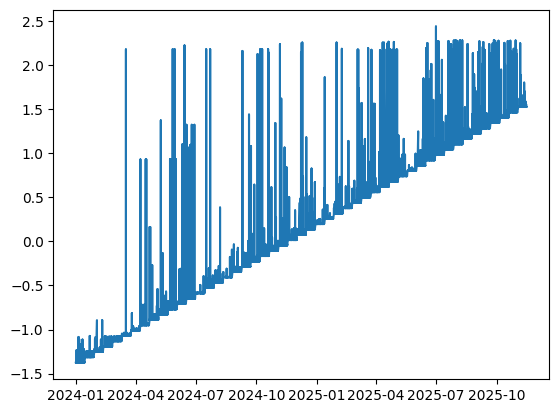

In [ ]:
plt.plot(df_new)
plt.show()

In [ ]:
import adtk
#from adtk.data import validate_series
#df_new = validate_series(df_new)

In [ ]:
from adtk.visualization import plot


The simplest test we can first execute is to use a threshold value to see on which days the stock went above or below a certain price. With different high and low we get different anomalies as shown below.

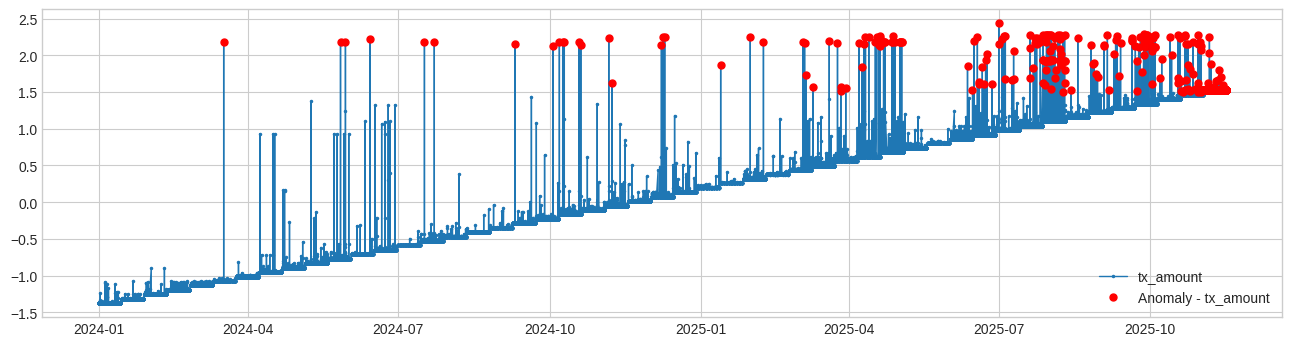

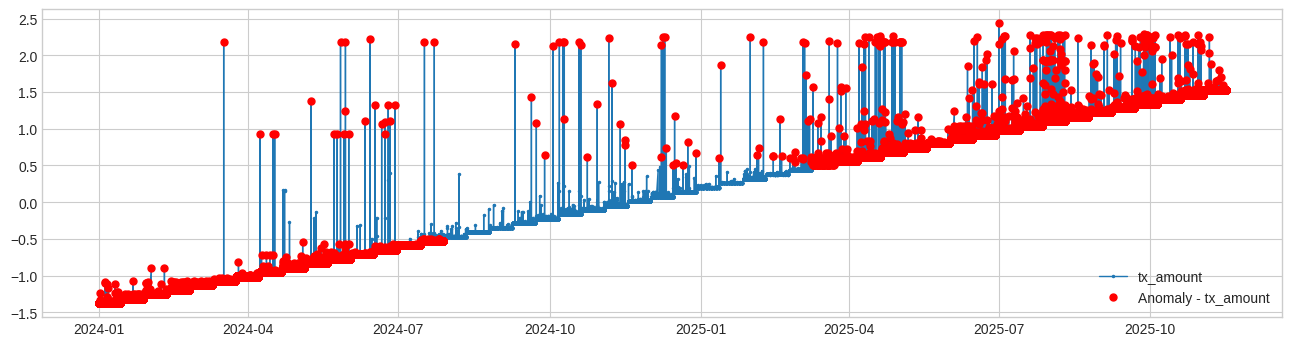

In [ ]:
from adtk.detector import ThresholdAD
threshold_ad = ThresholdAD(high=1.5, low=-1.5) #the high and low values of the threshold can bet set here
anomalies = threshold_ad.detect(df_new)
#next we plot the results of the threshold analysis. The Anomalies are marked in red
plot(df_new, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");
plt.show()
threshold_ad = ThresholdAD(high=0.5, low=-0.5) #the high and low values of the threshold can bet set here
anomalies = threshold_ad.detect(df_new)
#next we plot the results of the threshold analysis. The Anomalies are marked in red
plot(df_new, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");
plt.show()

Similar to the above plot we can check which values or above and below of our quantile treshold.

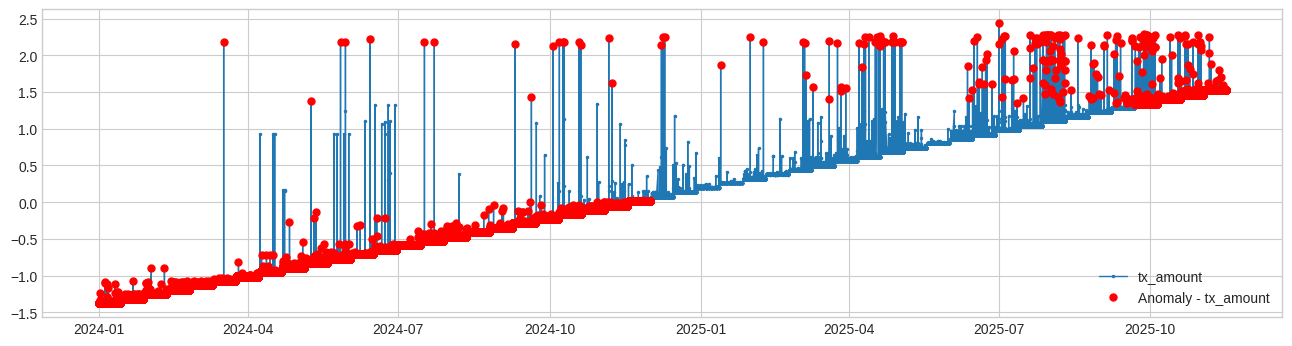

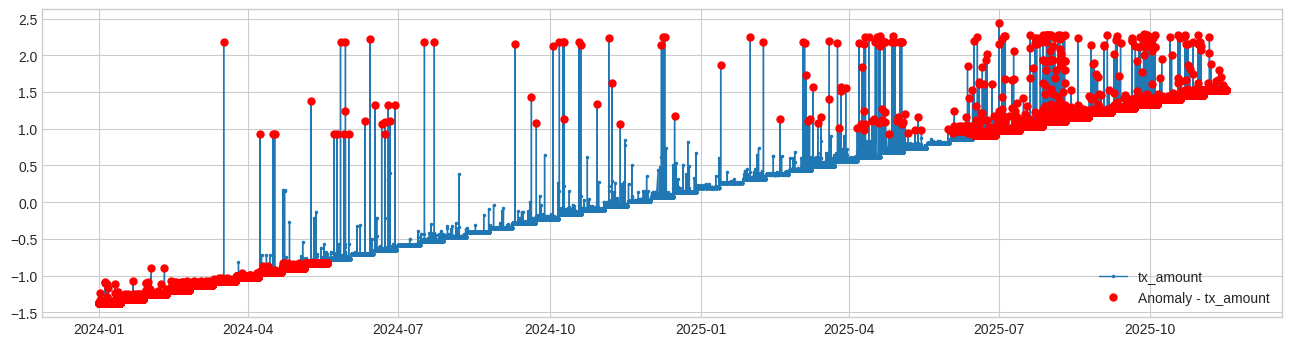

In [ ]:
from adtk.detector import QuantileAD
quantile_ad = QuantileAD(high=0.95, low=0.5) #sets the range of the quantiles
anomalies = quantile_ad.fit_detect(df_new)
plot(df_new, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");
plt.show()
quantile_ad = QuantileAD(high=0.75, low=0.25) #sets the range of the quantiles
anomalies = quantile_ad.fit_detect(df_new)
plot(df_new, anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_markersize=5, anomaly_color='red', anomaly_tag="marker");
plt.show()

In [ ]:
df_new["tx_amount"]

random_datetime
2024-01-01   -1.373723
2024-01-01   -1.373633
2024-01-01   -1.373782
2024-01-01   -1.373902
2024-01-01   -1.373782
                ...   
2025-11-16    1.525008
2025-11-16    1.525068
2025-11-16    1.524948
2025-11-16    1.524888
2025-11-16    1.525008
Name: tx_amount, Length: 46471, dtype: float64

In [ ]:
#from adtk.data import validate_series
#df_new = validate_series(df_new)

In [ ]:
df_new.index = pd.to_datetime(df_new.index)

In [ ]:
df_new

,tx_amount
random_datetime,
2024-01-01,-1.373723
2024-01-01,-1.373633
2024-01-01,-1.373782
2024-01-01,-1.373902
2024-01-01,-1.373782
...,...
2025-11-16,1.525008
2025-11-16,1.525068
2025-11-16,1.524948


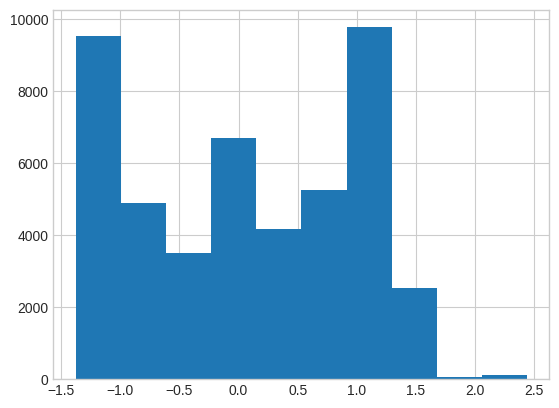

In [ ]:
plt.hist(df_new["tx_amount"])
plt.show()

In [ ]:
'''from adtk.detector import GeneralizedESDTestAD
esd_ad = GeneralizedESDTestAD(alpha=500) #Decreasing the alpha lowers the sensitivity and vice versa
anomalies = esd_ad.fit_detect()

#list(anomalies)
plot(df_new["tx_amount"], anomaly=anomalies, ts_linewidth=0.1, ts_markersize=0.03, anomaly_markersize=0.05, anomaly_color='red', anomaly_tag="marker");
plt.show()
'''

'from adtk.detector import GeneralizedESDTestAD\nesd_ad = GeneralizedESDTestAD(alpha=500) #Decreasing the alpha lowers the sensitivity and vice versa\nanomalies = esd_ad.fit_detect()\n\n#list(anomalies)\nplot(df_new["tx_amount"], anomaly=anomalies, ts_linewidth=0.1, ts_markersize=0.03, anomaly_markersize=0.05, anomaly_color=\'red\', anomaly_tag="marker");\nplt.show()\n'

Next, we will employ a model called PersistAD, which uses a double rolling aggregate technique. This model directly compares each time series value with its preceding values. We will start by using it to detect significant positive changes in stock prices.
The c parameter acts as a threshold that determines the sensitivity of the anomaly detection process. It controls how much a value in the time series must deviate from the expected value (calculated using the double rolling aggregate) to be flagged as an anomaly. When side is positive this means that value is greater then expected values +c and when it is negative it means the expected value-value < -c

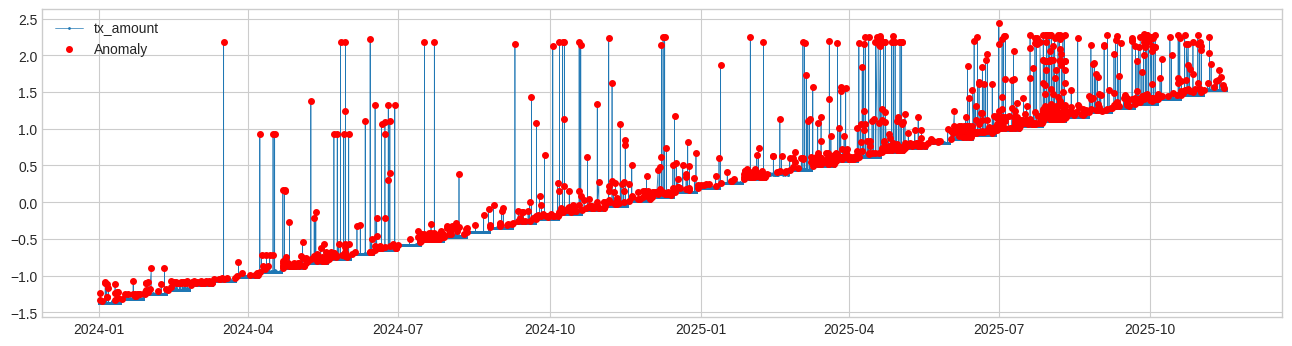

In [ ]:
from adtk.detector import PersistAD
from adtk.data import to_events

# Create a PersistAD detector
persist_ad = PersistAD(c=100, side='positive')  # side can be positive or negative. Increasing c, which is the threshold, will result in fewer points being identified as anomalous

# Fit the detector to the data and detect anomalies
anomalies = persist_ad.fit_detect(df_new["tx_amount"])

plot(df_new["tx_amount"], anomaly=anomalies,  anomaly_color='red',anomaly_tag='marker')
plt.show()

Change c.

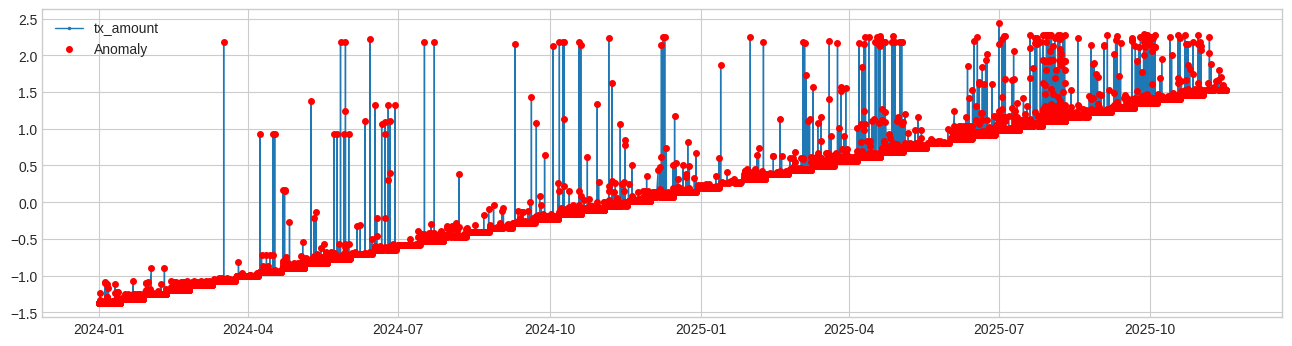

In [ ]:

persist_ad = PersistAD(c=0.003, side='positive')  # side can be positive or negative. Increasing c, which is the threshold, will result in fewer points being identified as anomalous

# Fit the detector to the data and detect anomalies
anomalies = persist_ad.fit_detect(df_new["tx_amount"])
#print(df.head())
#print(anomalies)
# Convert the anomalies to events
#anomalies_events = to_events(anomalies)
#print(anomalies_events)
# Plot the anomalies
plot(df_new["tx_amount"], anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red',anomaly_tag='marker')
plt.show()

Now change side

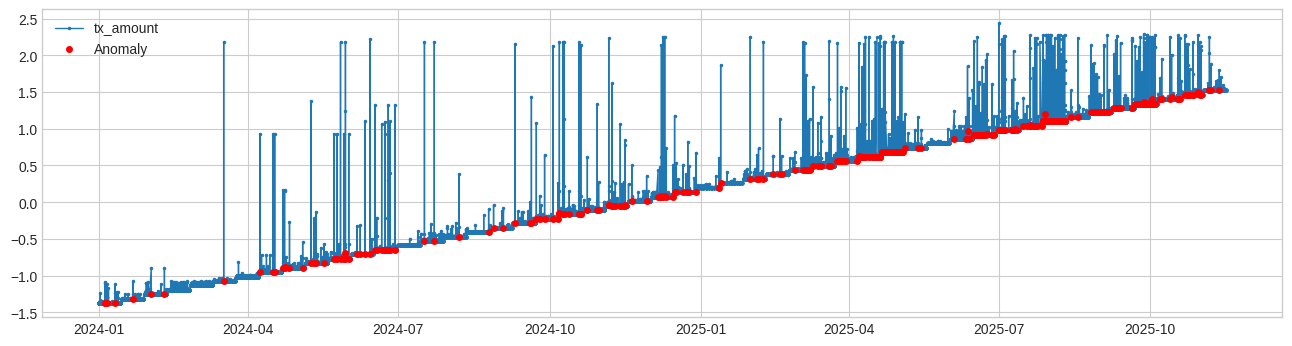

In [ ]:
persist_ad = PersistAD(c=1000, side='negative') #side can be positive or negative. Increasing c, which is the threshold
# will result in fewer points being identified as anamolous
anomalies = persist_ad.fit_detect(df_new["tx_amount"])
plot(df_new["tx_amount"], anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red',anomaly_tag='marker')
plt.show()


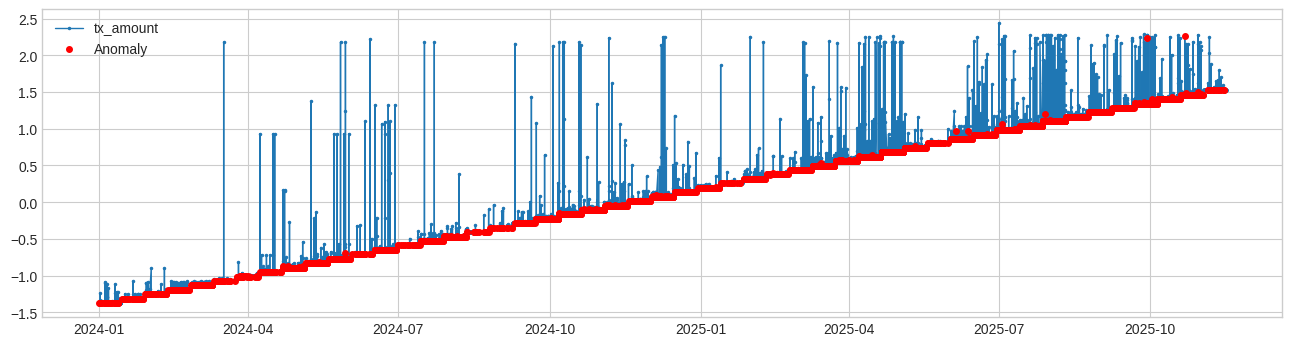

In [ ]:
persist_ad = PersistAD(c=10, side='negative') #side can be positive or negative. Increasing c, which is the threshold
# will result in fewer points being identified as anamolous
anomalies = persist_ad.fit_detect(df_new["tx_amount"])
plot(df_new["tx_amount"], anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red',anomaly_tag='marker')
plt.show()

We can have window parameter also. It is 1 when we do not have specifically write it.

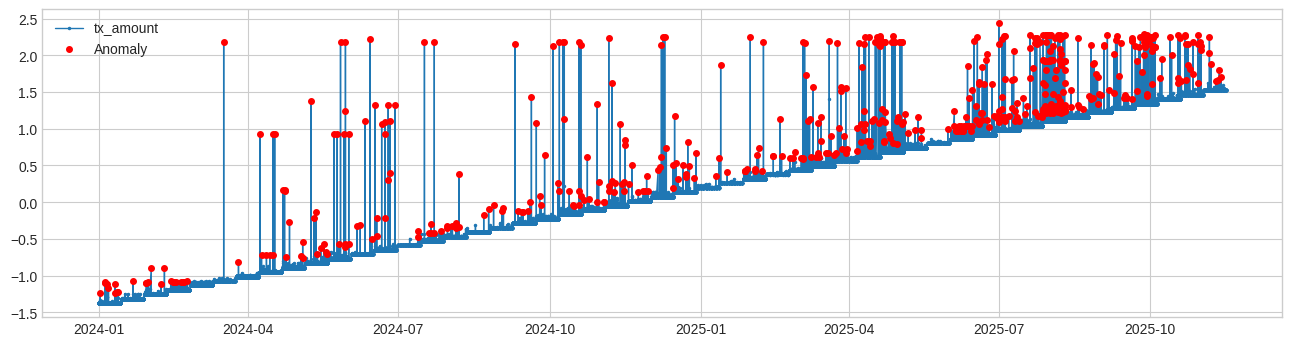

In [ ]:

persist_ad = PersistAD(c=300, side='positive',window=2)  # side can be positive or negative. Increasing c, which is the threshold, will result in fewer points being identified as anomalous

# Fit the detector to the data and detect anomalies
anomalies = persist_ad.fit_detect(df_new["tx_amount"])

plot(df_new["tx_amount"], anomaly=anomalies, ts_linewidth=1, ts_markersize=3, anomaly_color='red',anomaly_tag='marker')
plt.show()

Next, we will implement the Level Shift AD model. This model detects shifts in value levels by tracking the difference between median values in two adjacent sliding time windows. It is not sensitive to instantaneous spikes, making it a good choice for datasets with frequent noisy outliers. Here side means if difference c is positive, negative or both.

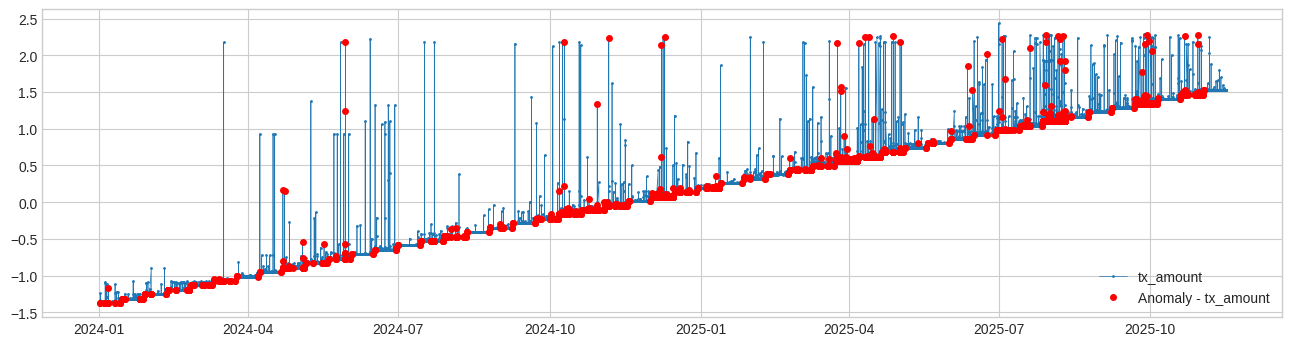

In [ ]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=5.0, side='both', window=5)
anomalies = level_shift_ad.fit_detect(df_new)
plot(df_new, anomaly=anomalies, anomaly_color='red',anomaly_tag='marker')
plt.show()

Change windows

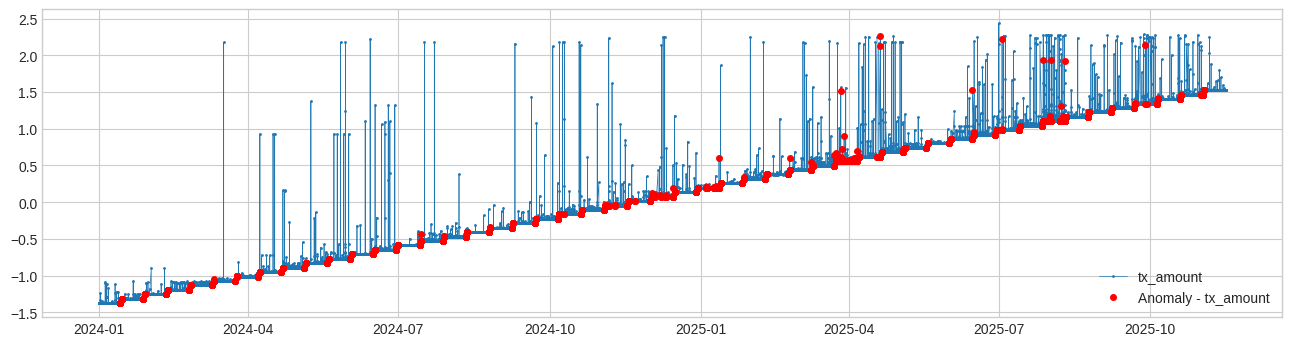

In [ ]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=5.0, side='both', window=14)
anomalies = level_shift_ad.fit_detect(df_new)
plot(df_new, anomaly=anomalies, anomaly_color='red',anomaly_tag='marker')
plt.show()

Change the c value

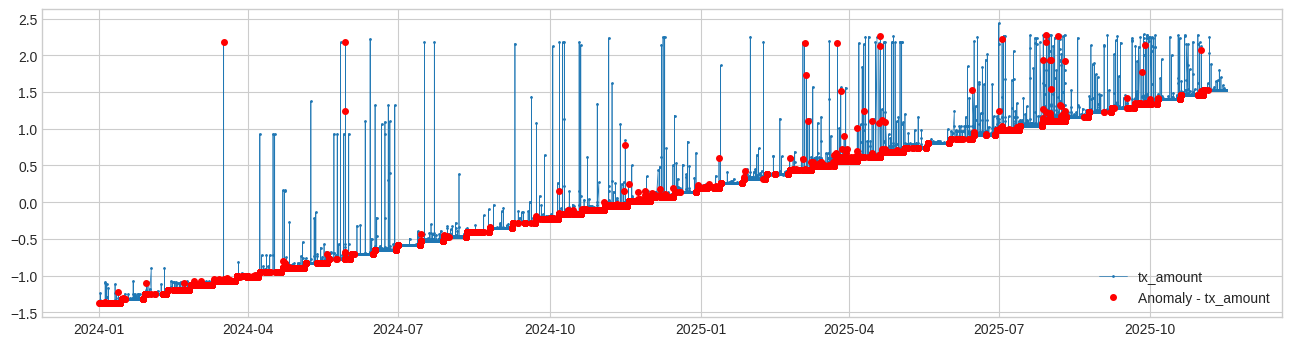

In [ ]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=1.0, side='both', window=14)
anomalies = level_shift_ad.fit_detect(df_new)
plot(df_new, anomaly=anomalies, anomaly_color='red',anomaly_tag='marker')
plt.show()

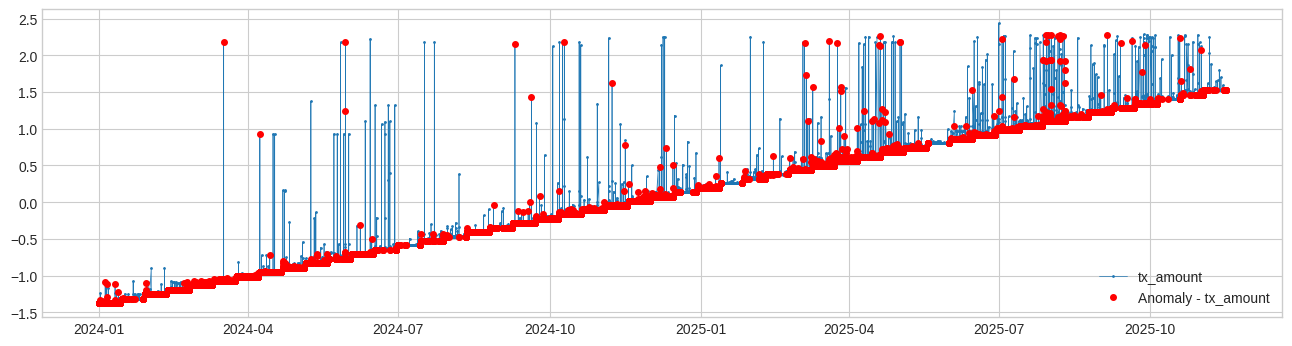

In [ ]:
from adtk.detector import LevelShiftAD
level_shift_ad = LevelShiftAD(c=0.1, side='both', window=14)
anomalies = level_shift_ad.fit_detect(df_new)
plot(df_new, anomaly=anomalies, anomaly_color='red',anomaly_tag='marker')
plt.show()

To monitor fluctuations in a time series, we can employ the Volatility Shift AD method. This approach identifies volatile shifts by comparing standard deviations across two adjacent sliding time windows. These windows are positioned next to each other and help identify periods when data points consistently change compared to the previous window. We'll apply this model to analyze the trading volume data.

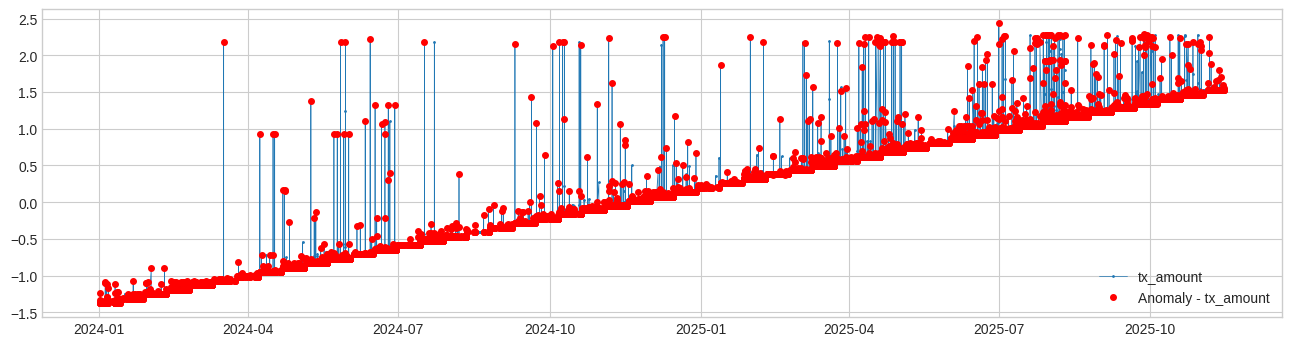

In [ ]:
from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=10, window=5)
anomalies = volatility_shift_ad.fit_detect(df_new)
plot(df_new, anomaly=anomalies, anomaly_color='red',anomaly_tag='marker')
plt.show()

Change window size

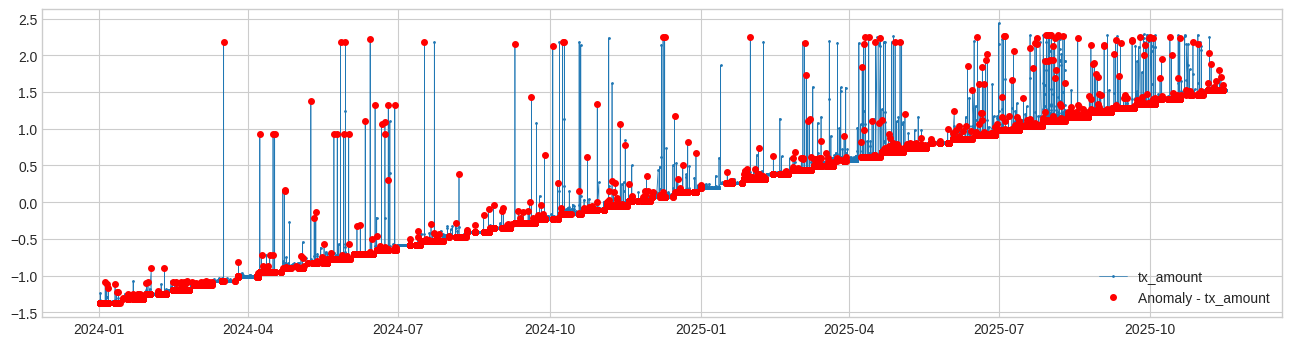

In [ ]:
from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=10, window=15)
anomalies = volatility_shift_ad.fit_detect(df_new)
plot(df_new, anomaly=anomalies, anomaly_color='red',anomaly_tag='marker')
plt.show()

Change the c value

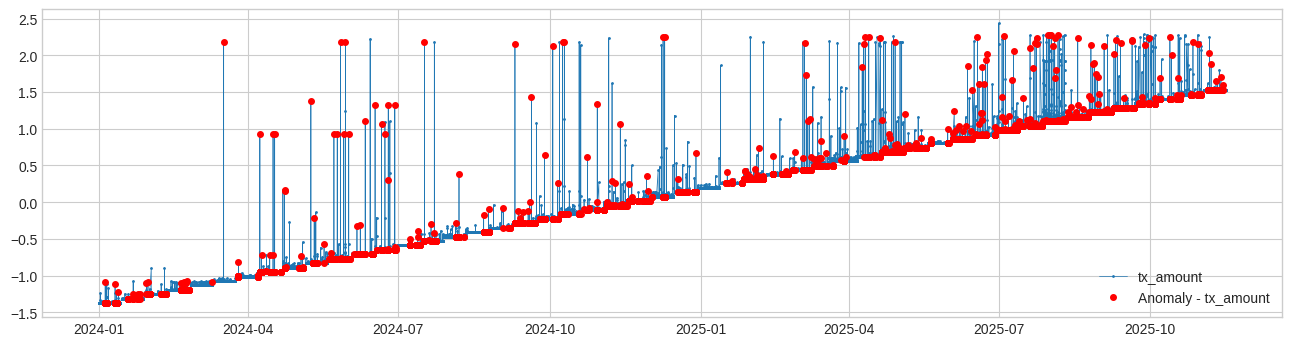

In [ ]:
from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=30, window=15)
anomalies = volatility_shift_ad.fit_detect(df_new)
plot(df_new, anomaly=anomalies, anomaly_color='red',anomaly_tag='marker')
plt.show()

Play with the side parameter

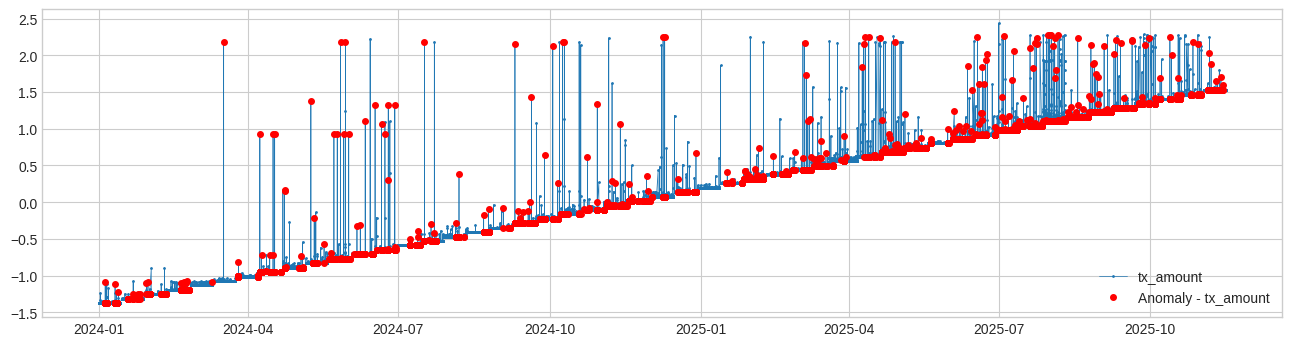

In [ ]:
from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=30, window=15,side='positive')
anomalies = volatility_shift_ad.fit_detect(df_new)
plot(df_new, anomaly=anomalies, anomaly_color='red',anomaly_tag='marker')
plt.show()

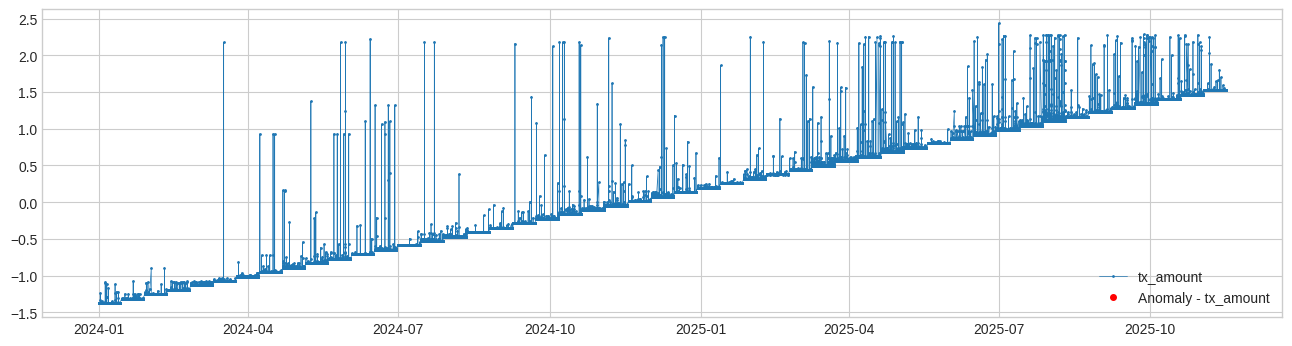

In [ ]:
from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=30, window=15,side='negative')
anomalies = volatility_shift_ad.fit_detect(df_new)
plot(df_new, anomaly=anomalies, anomaly_color='red',anomaly_tag='marker')
plt.show()

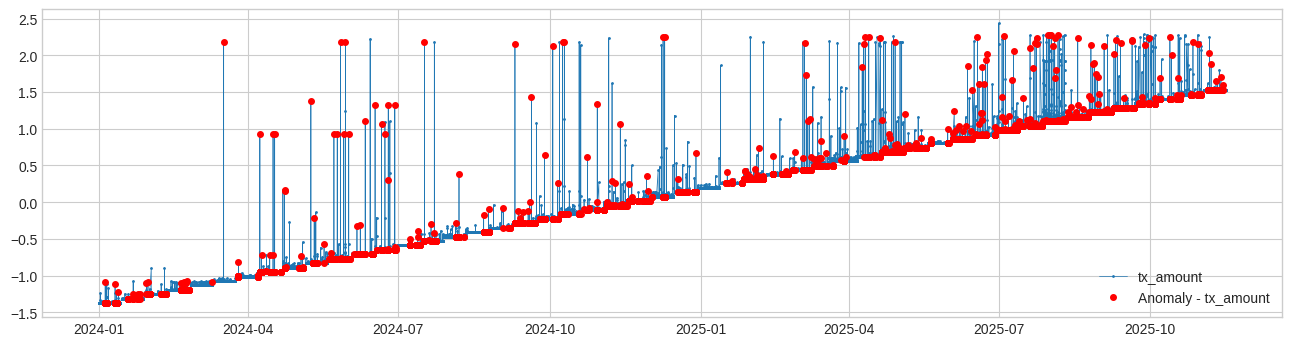

In [ ]:
from adtk.detector import VolatilityShiftAD
volatility_shift_ad = VolatilityShiftAD(c=30, window=15,side='both')
anomalies = volatility_shift_ad.fit_detect(df_new)
plot(df_new, anomaly=anomalies, anomaly_color='red',anomaly_tag='marker')
plt.show()